# Redes Neuronales Convolucionales (CNN)

![cnn.jpeg](./cnn.jpeg)

- La meta es reducir el ancho/alto y aumentar la profundidad
- Transformar información espacial en features (feature maps)

In [1]:
import keras
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import YouTubeVideo

Using TensorFlow backend.


## Intro CNNs:

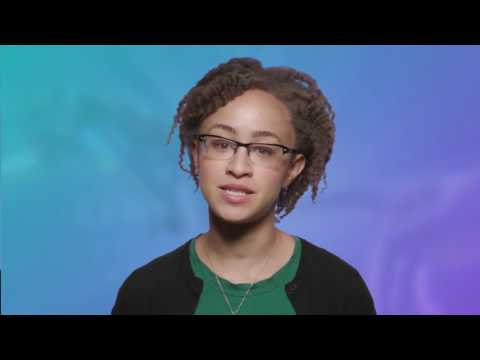

In [2]:
YouTubeVideo('HrYNL_1SV2Y')

## Capas convolucionales

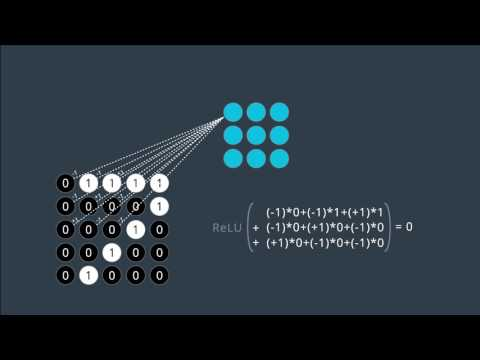

In [3]:
YouTubeVideo('h5R_JvdUrUI')

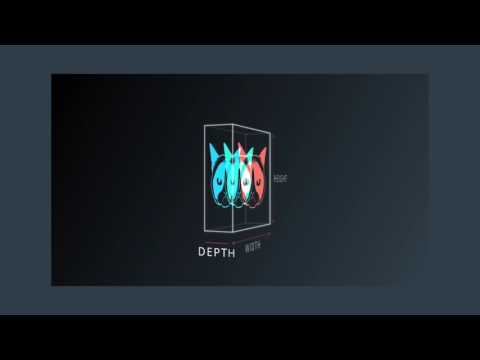

In [4]:
YouTubeVideo('RnM1D-XI--8')

## Capas pooling

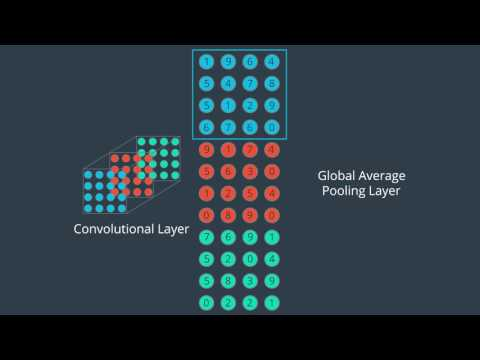

In [5]:
YouTubeVideo('OkkIZNs7Cyc')

## CNN en clasificación de imágenes

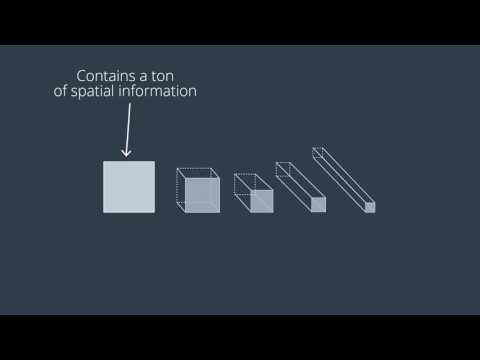

In [6]:
YouTubeVideo('l9vg_1YUlzg')

## Resumen videos

### Capa convolucional:
**Su función es aumentar la profundidad (espacialidad --> features)**
![convolve.png](./convolve.png)
- [Ver Ejemplo Auto](https://github.com/udacity/aind2-cnn/blob/master/conv-visualization/conv_visualization.ipynb)

#### Hyperparámetros
- Para aumentar la dimensionalidad de una CNN: Aumento la **cantidad de filtros**
- Para incrementar el tamaño/complejidad de los patrones detectados: Aumento el **tamaño del filtro**
- **Stride**: Paso. Determina el tamaño de los filtros del siguiente nivel
- **Padding**: Que hacemos con los bordes? 'same': mantiene la dimensión de la entrada; 'valid': no padding
- [Video](https://youtu.be/Qt5SQNcQfgo)

#### Como usamos esto en [keras](https://keras.io/layers/convolutional/)?

In [7]:
from keras.models import Sequential
from keras.layers import Convolution2D

In [8]:
model = Sequential()
model.add(Convolution2D(filters=1, strides=1, kernel_size=8, padding='same',activation='relu',input_shape=(64,64,1)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 1)         65        
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


Hacer pruebas y explicar 'Output Shape' y 'Param #':
- filters=1, strides=1, kernel_size=1, padding='same'
- filters=16, strides=1, kernel_size=1, padding='same'
- filters=1, strides=1, kernel_size=4, padding='same'
- filters=10, strides=1, kernel_size=4, padding='same'
- filters=1, strides=2, kernel_size=5, padding='same'
- filters=1, strides=2, kernel_size=5, padding='valid'
- filters=16, strides=2, kernel_size=5, padding='same'
- filters=16, strides=4, kernel_size=4, padding='same', input_shape=(32,32,1)
- filters=16, strides=4, kernel_size=4, padding='same', input_shape=(32,32,3)

### Capa Pooling
**Su función es reducir la cantidad de parámetros, bajar la dimensionalidad**

Max Pooling
![Max-polling.png](./Max-polling.png)

#### Hyperparámetros
MaxPooling
- Pool size
- Strides: En este caso esta en None por default lo que significa que strides=pool_size

#### En [keras](https://keras.io/layers/pooling/)

In [9]:
from keras.layers import MaxPooling2D

In [10]:
model = Sequential()
model.add(MaxPooling2D(pool_size=(4,2), strides=None, padding='same', input_shape=(32,32,1)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d_1 (MaxPooling2 (None, 8, 16, 1)          0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


Hacer pruebas y explicar 'Output Shape' y 'Param #':
- pool_size=(2,2), strides=None, padding='same'
- pool_size=(4,2), strides=None, padding='same'
- pool_size=(3,3), strides=None, padding='same'
- pool_size=(3,3), strides=None, padding='valid'


Global Average Pooling  
- Un resultado(Promedio) por cada canal a diferencia que el Max Pooling que se aplica dentro del mismo canal
- Utilizada para reducir la dimensionalidad en las ultimas capas
![GAP.png](./GAP.png)

#### En [keras](https://keras.io/layers/pooling/)

In [11]:
from keras.layers import GlobalAveragePooling2D

In [13]:
model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=(32,32,20)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 20)                0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


#### AveragePooling

In [16]:
from keras.layers import AveragePooling2D

In [19]:
model = Sequential()
model.add(AveragePooling2D(4, 4, input_shape=(32,32,20)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling2d_3 (Average (None, 8, 8, 20)          0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


## Preguntas:

- Como cierro la red? Que utlilzar? GAP o DENSA?
- Que implica hacer mas grande o mas pequeño el filtro?